# Machine Learning and Statistics Project 2019

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import keras as kr

import statsmodels.api as sm
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

from IPython.core.display import HTML

import sklearn
from sklearn import linear_model, preprocessing, metrics
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold,  cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor


from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense

from termcolor import colored
import pandas_profiling as pp
import plotly.graph_objs as go

import xgboost
import shap

# Used to Evaluate our model
import math
import time

# Nicely formatted plots
%matplotlib inline

# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
bhp = load_boston()
prices = bhp.target # Define the target values
features = bhp.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = bhp.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target

Using TensorFlow backend.


<hr>

## Explore the Data

I explored the dataset using <u>print(bhp)</u> but the output is not exactly easy to interpret. In a real-world situation, offering clients or an employer this output would not be very professional. It can be easy for a person to lose interest or miss important aspects of the output.

In [2]:
# Key things to note is data, target, feature_names as I will use these during the project
print(bhp)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

***
We can seen form the above output that it is not exactly user readable. 

In the cell below I have outputted the same contents as above but in a structured and attractive way. It is very easy to understand what the dataset consists of by using <u>.DESCR</u>. I have also outputted the number of houses using <u>data.shape[0]</u> and the number of columns/features using <u>data.shape[1].</u> <i>(range(Y.shape[0])&rdquo;? and Ananthan, 2019)</i>


<i>Key things to note from the data set details below are :</i>
    1. The number of Instances and Attributes. 
    2. The column headings and what each column represents.
    3. Missing values?. I will check for this using a Python command to confirm.
    4. Creators.   
    5. Attribute 14(MEDV) will be the target

In [3]:
# Describe the Dataset
print (bhp.DESCR)

print ("---------------------------------------------")
print ("Summary\n")

# Number of houses
houses = data.shape[0]

# Number of features
features = data.shape[1]

print ("Number of Houses          : ", houses)
print ("Number of Housing Features: ", features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***

### Peek at the data

The code below will output n number of rows from the top and bottom of the Boston Housing Dataset. In the below example I have specified three. If no number is entered it will output five rows by default. By implementing this we can see the amount of columns along with the column names, we can see what variable type is used (Boston Data set is outputting boolean variable types), and we can see the row count.

In [4]:
# View the top of the dataset.
print(colored("\n\n                         View at the frist three rows of the dataset ", 'red'))
print((boston.head(3)))


# View end of the dataset.
print(colored("\n\n                         View at the last five rows of the dataset \n", 'red'))
print((boston.tail()))



                         View at the frist three rows of the dataset 
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


                         View at the last five rows of the dataset 

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050

***

### Describe / Missing Values
***
The python "describe" method is a great option to use that will display the median, mean, min, max, standard deviations etc. It is a good idea to to create this as it is easy to view and can indicate any unexpected or surprising distributions in the dataset. Note that I have taken the transform of the result by adding a .T to the output, this in turn will swaps the rows and columns.

I have checked for missing values or an empty cell as this will need to be checked for machine learning. If we find missing values we can deal with these in three ways.
    * Use the mean or median to replace the missing value
    * Use a larger negative number such as -999

In [5]:
# Statistical details of each column. How many rows, highest & lowest in each column etc
print(boston.describe().T)

print("\n \n \n")

print(colored("Check for null values within the dataset \n", "red"))
# Check, data types etc.
print(boston.info())

# Check for missing data
print("\n\n\nCheck for missing data\n",boston.isnull().any())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

## Statistical Analysis

By using the NumPy library I am able to calculate a few meaningful statistics about the dataset around pricing as seen below.

In [6]:
# Number of houses
total_houses = data.shape[0]

# Number of features
total_features = data.shape[1]

# Max price
max_price = np.amax(prices)

# Minimum price
min_price = np.min(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation
std_dev = np.std(prices)

# Calculate and show statistics
print ("House prices in $1000's\n")
print ("Total houses       :", total_houses)
print ("Total features     :", total_features)
print ("Minimum price      : ${:,.0f}".format(min_price*1000))
print ("Maximum price      : ${:,.0f}".format(max_price*1000))
print ("Mean price         : ${:,.2f}".format(mean_price*1000))
print ("Median price       : ${:,.2f}".format(median_price*1000))
print ("Standard deviation : ${:,.2f}".format(std_dev*1000))

House prices in $1000's

Total houses       : 506
Total features     : 13
Minimum price      : $5,000
Maximum price      : $50,000
Mean price         : $22,532.81
Median price       : $21,200.00
Standard deviation : $9,188.01


***
### Histogram

The histogram is very useful when we want to explore our data and give us an understanding of the distribution of the data set. We can set the bin size (by default this is set to 20). It is a good idea to change the bin size as it will output the graph in different ways and might potentially display something that is hidden.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018842397508>


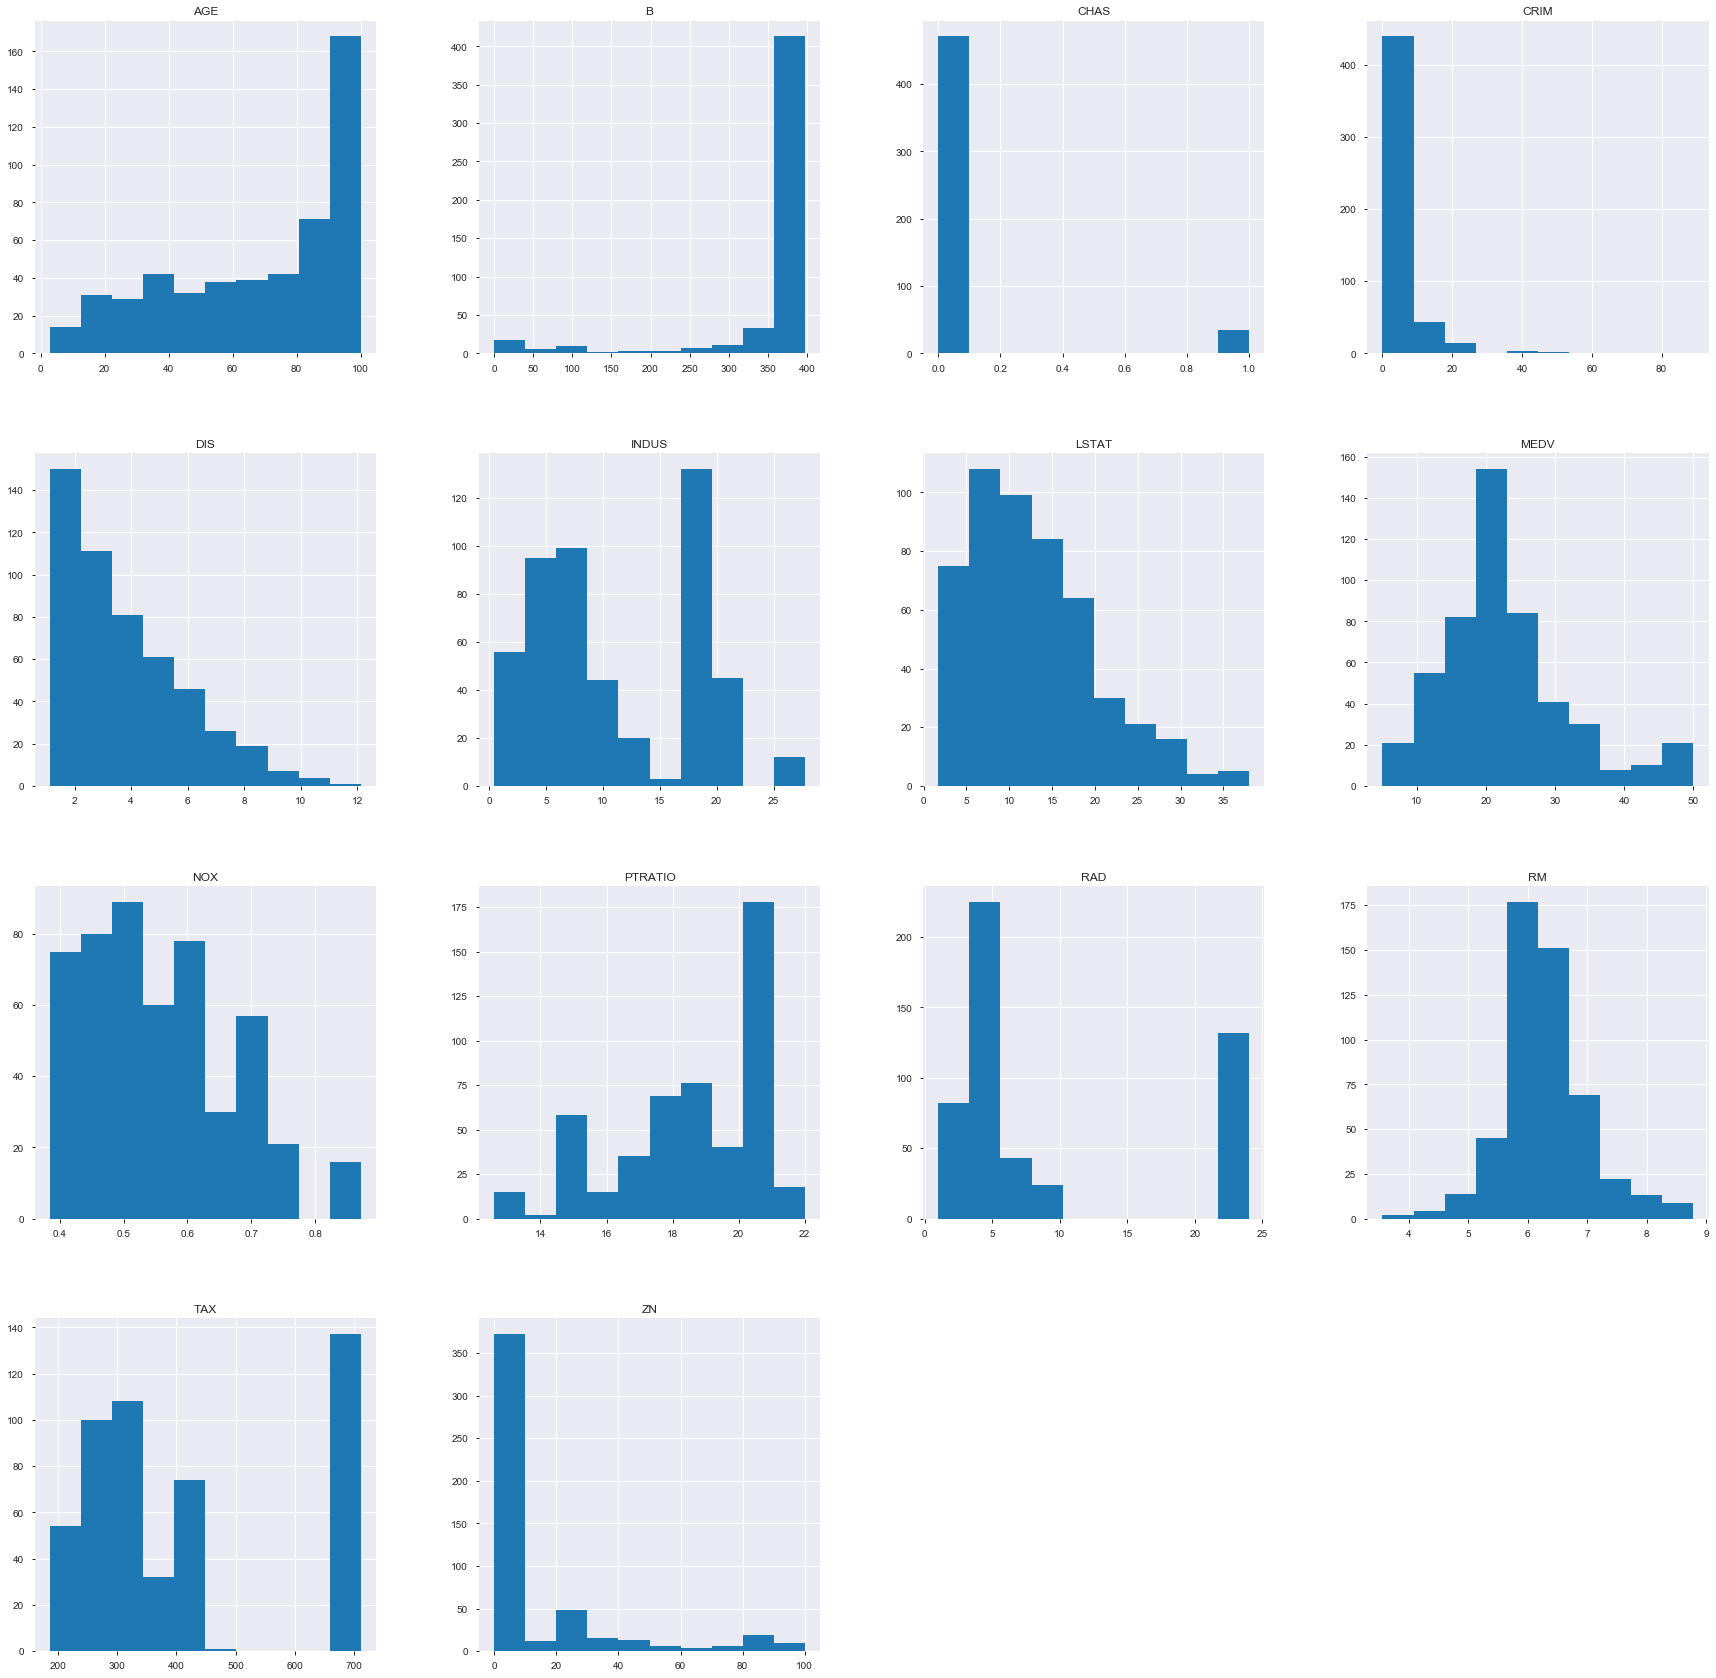

In [7]:
print(boston.hist(bins=10, figsize=(30, 30)))

***
### Correlations 

A heatmap is a very handy tool we can use to view the data in 2-dimensional form with the functions falling between a range of one to minus one (1 = Positive Correlation, -1 = Negative correlation, 0 = No correlation). A correlation plot is a good way to analysis the dataset to see if any pattern can be found.

From the correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list. You can find the reason behind this here.

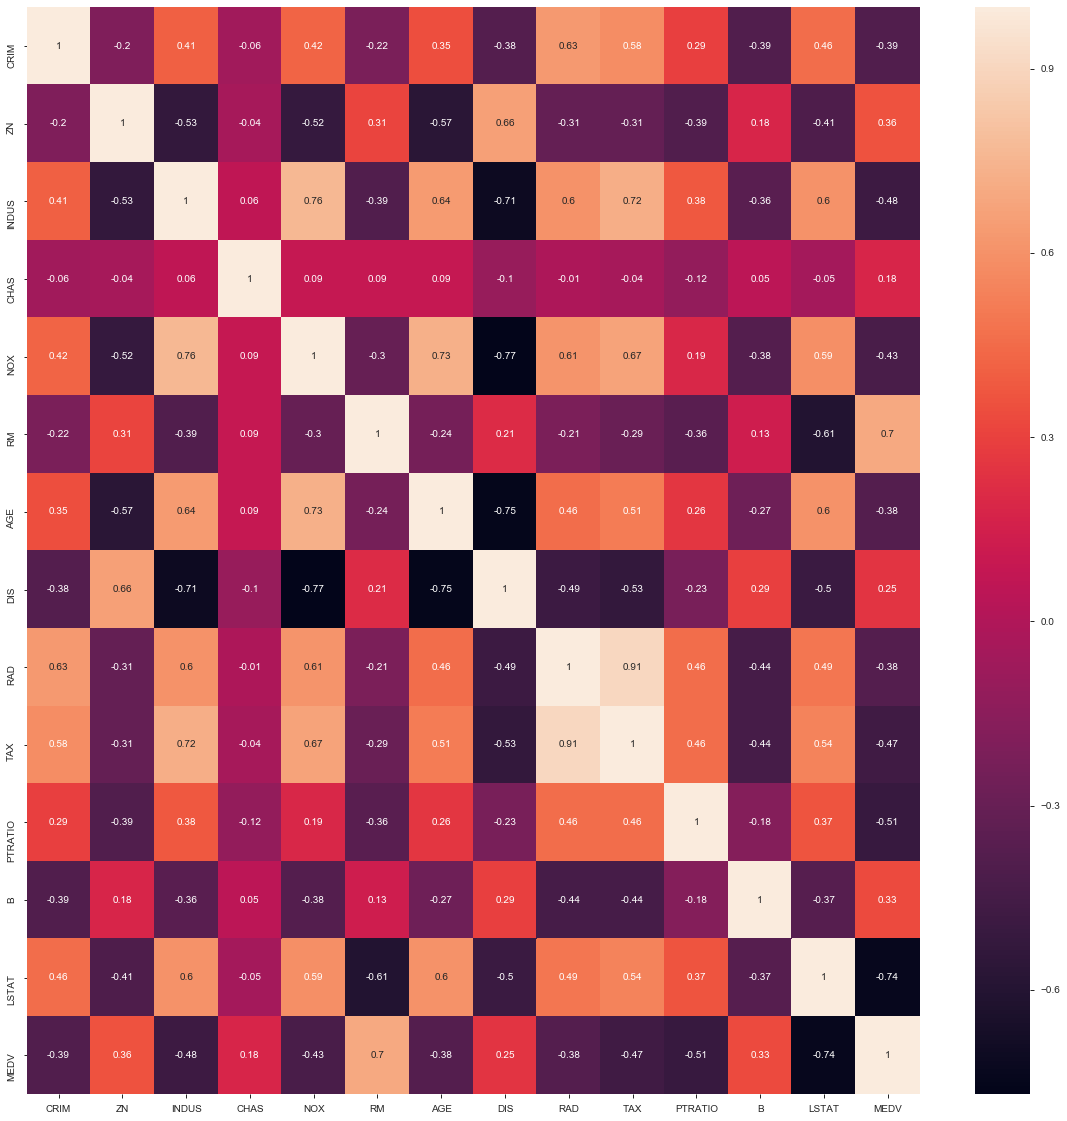

In [8]:
# Generate Heatmap
plt.figure(figsize = (20,20))
corr = sns.heatmap(boston.corr().round(2), annot=True)

## Profiling Report

<i>For profiling we first need to go to the command line and type <u>"install -c conda-forge pandas-profiling".</u></i>
    
Profiling is a simple and quick way to explore the dataset and is a similar to the previous methods such as .describe() and .info() as these offer a very basic overview and with large datasets profiling is a much better option. Pandas Profiling function extends the pandas DataFrame for quick data analysis. It displays a lot of information with a single line of code. This display is very user friendly as it is displayed like a report that interactive. (Medium, 2019) 

Once the single line of code is run it will display a HTML type layout that displays analysis such as type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

In [9]:
# Print the profiling report
pp.ProfileReport(boston)

## Find total of houses that are along the Charles river and those that aren’t.

In this section I will analyse whether there is a difference in median house prices between houses that are along the Charles river and those that aren’t. I will use two columns to find the median price, the first column will be CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) and the second column will be MEDV (Median value of owner-occupied homes in $1000's). I will also use statsmodels.api to output the OLS regression results.

From my findings I can see that the median house price along the river is 23.30 (In 000's) and the median house price not along the river is 20.90 (In 000's).

In [10]:
# Find total of houses that are along the Charles river and those that aren’t.

# Find houses either along the river. ['CHAS']==1] means that they are beside the river
chas1=boston[boston['CHAS']==1]['MEDV']

# Pull columns to generate OLS model
x=boston[boston['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
y=boston[boston['CHAS']==1]['MEDV']


# Find houses either not along the river ['CHAS']==1] means that they are not beside the river
chas0=boston[boston['CHAS']==0]['MEDV'] 

# Pull columns  OLS model
z=boston[boston['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
a=boston[boston['CHAS']==0]['MEDV']

#---------------------------------------------------------------------------------------------------------#
# Find the total number of house along the charles river
check1 = (boston.CHAS == 1).sum()

# Find the median of MEDV where CHAS == 1
medianMEDV1 = (boston.loc[boston["CHAS"] == 1]["MEDV"]).median()
print ("Total number of houses along the river is = ",(check1), ", and the median price along the river in $1000's : ${0:.2f}".format(medianMEDV1), "\n")

# OLS Regression for houses beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

# Find the total number of house not along the charles river
check0 = (boston.CHAS != 1).sum()

# find and print the locations where CHAS = 0. Will edit this out for viewing reason 
check = (boston.loc[boston['CHAS'] != 1])
#print("Position numbers of these 0.0 results are : \n",(check.CHAS))

# Find the median of MEDV where CHAS == 0
medianMEDV0 = (boston.loc[boston["CHAS"] != 1]["MEDV"]).median()
print ("\n\n\nTotal number of houses not along the river is = ",(check0), ", and the median price not along the river in $1000's : ${0:.2f}".format(medianMEDV0),"\n")


# OLS Regression for houses not beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(a, z).fit()
predictions = model.predict(z)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

Total number of houses along the river is =  35 , and the median price along the river in $1000's : $23.30 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:43:26   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

***
### T Test

The t test is a measurement of whether the average (expected) value will differ significantly across the samples provided. A large p-value (greater than 0.05 or 0.1) then we cannot reject the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

The result of the ttest I ran is 7.390623170519905e-05 or 0.00007390623170519905(real number). It is clear to see that the p-value is below 1 percent, this implies high significance we can reject the null hypothesis. 

In [11]:
# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.ttest_ind(chas1, chas0))

# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.stats.mannwhitneyu (chas1,chas0))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)
MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)


***
### Scatter Plot & RegPlot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables. This association is called a correlation (Chartio, 2019). Please note the starting points of the scale because it does not start a (0,0). 

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

I have also used Seaborns plotting library to generate a regplot from the scatterplot created as it will automatically add a linear regression fit. Linear Regression is a way to find the best linear relationship or line of best fit between two variables. With a line of best fit given a dependent variable (x), we could predict our independent variable (y).
The goal of linear regression is to find the line of best fit for our data that will result in the predicted y’s to be as close to our known y values we give it. Below is a helpful image of the equation for linear regression:

DECRIBE THE CATPLOT

It is clear to see from the scatterplot and regplot that whether a house is closer or not to the river or not has not significant pattern as the house prices in both areas range high to low.

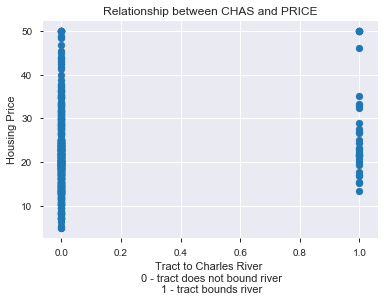

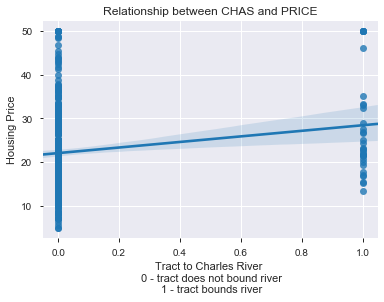

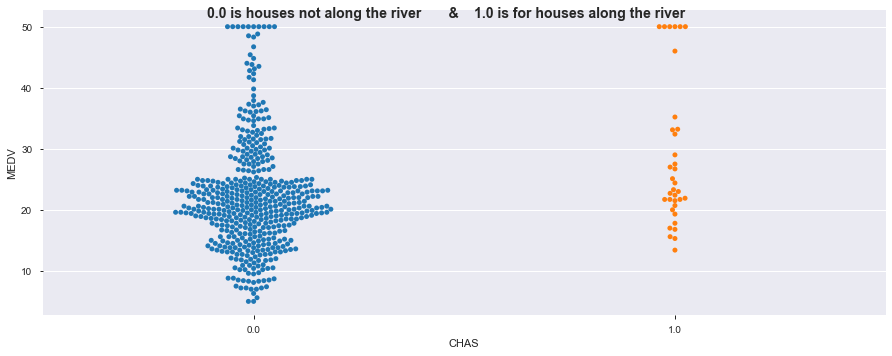

In [12]:
#scatter plot between *CHAS* and *PRICE*
plt.scatter(boston.CHAS, boston.MEDV)
plt.xlabel('Tract to Charles River \n 0 - tract does not bound river\n 1 - tract bounds river')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and PRICE')
plt.show()

sns.regplot(y="MEDV", x="CHAS", data=boston, fit_reg = True)
plt.xlabel('Tract to Charles River \n 0 - tract does not bound river\n 1 - tract bounds river')
plt.ylabel('Housing Price')
plt.title('Relationship between CHAS and PRICE')
plt.show()

# Lets view the amount of houses that are either beside or not beside the river
colours = ["blue", "red"] # Define Plot Colours 

# Add kind. height and aspect to position accross the page
sns.catplot(x="CHAS", y="MEDV", data=boston, kind="swarm", height=5, aspect=2.5)
suptitle('0.0 is houses not along the river       &    1.0 is for houses along the river', fontsize=14, fontweight='bold')
plt.show()

***
## Keras

Keras is a high-level neural networks API that is written in Python and can run on top of TensorFlow which I have used in this project and will allow me to define, train and make predictions using a neural network. A neural network is a series of algorithms that are used to identify relationships through a process similar to the human brain, the neural network is very good with changing inputs and will generate the best results each time without having to redesign the output criteria. Keras is user friendly, easy to extend and modular. The aim of Keras is to enable faster experimentation so we can receive the result in fast amount of time (Keras.io, 2019) 

Pandas allow us to use df.corr() to find the pairwise correlation within the dataframe. If any of the values are empty .corr will identify them and automatically excluded them from the output. For any non-numeric data type columns in the dataframe it is ignored.

Large positive scores indicate a strong positive (that is, in the same direction) correlation.As expected, we see maximum values of 1 on the diagonal.

In [13]:
boston.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

***

### Split the dataset
The next part of this project I want to train it with the help of Kearas. The most common split ratio is 70:30 which I will implement in this project although if we were using a small dataset a ratio of 90:10 would be sufficient. Training data will be used to train the model while the unseen data is used to validate the model performance. (Singh and scikit-learn, 2019). Splitting the data set into X(input attribute) an Y(output attribute) will enable me to model the dataset much easier.

I have used random_state and I have passed an integer values. This will act as the seed for the random number generator when the spilt occurs. We can however pass an instance of the RandomState class, and in turn this will become the number generator. If we have not used/ passsed anything, RandomState will be used by np.random. (Medium, 2019)

Once the data is split 70:30 I have added a print statement to check if the was successful. The dataset has 506 data points. The output of 354:152 (70:30) along with a percentage that shows that it is not exactly 70:30 but it is as close as we can get.

When we are working with featured that use different scales and ranges it is considered to be a good idea to normalise them. To do this on I subtract the mean of the feature and divide by the standard deviation, this process will need to be completed on all features. The model might work successfully without feature normalization but can in turn become a more difficult process with regards to training, and it will also make the resulting model much more dependant on the choice of units used in the input.<i>(Colab.research.google.com, 2019)</i> Once I have implemented this we can confirm that it was successful by executing a print(X_train) / print(X_test) and we can see that the output is in the same scale. 

In [14]:
'''assign columns to X and Y.'''
Y = boston["MEDV"]
X = boston.iloc[:,0:13] # assign the first 13 columns


'''Split data into training and test data and Print to screen if split completed'''
# random_state sets a seed to the random generator
# test_size should be between 0.0 and 1.0 and will represent the proportion I want to include in the train split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9, shuffle=True)
print("Training and testing split was successful.\n")


'''Normalise features'''
# Assign X_Train mean to var mean
mean = X_train.mean(axis=0) 
# Assign X_train standard deviation to variable std
std = X_train.std(axis=0)
# Minus the mean from X_train then divide by standard deviation and store in variable X_train
X_train = (X_train - mean) / std
# Minus the mean from X_test then divide by standard deviation and store in variable X_tese
X_test = (X_test - mean) / std


''' Check if the data has split 70 / 30 and store in variables x and y so I can display percent output'''
x = (float(X_train.shape[0] / float(X.shape[0]))) 
print("X_Train size is : ",X_train["CRIM"].count(), "which is  : " +"{:.2%}".format(x))

y = (float(X_test.shape[0] / float(X.shape[0])))
print("X_Test  size is : ",X_test["CRIM"].count(),"which is  : " +"{:.2%}".format(y))

''' View the shape of 2x Test and 2x Train'''
print("\nShape of X_Train :" ,X_train.shape)
print("Shape of X_Test  :"   ,X_test.shape)
print("\nShape of Y_Train :" ,Y_train.shape)
print("Shape of Y_Test  :"   ,Y_test.shape)

''' View the shape of X and Y'''
print("\nShape of X :",X.shape)
print("Shape of Y :"  ,Y.shape)

''' Test if normalisation was sucessful'''
print("\n\n                         X_Train after Normalisation \n",X_train)
print("\n\n\n                         X_Test after Normalisation \n", X_test)

Training and testing split was successful.

X_Train size is :  354 which is  : 69.96%
X_Test  size is :  152 which is  : 30.04%

Shape of X_Train : (354, 13)
Shape of X_Test  : (152, 13)

Shape of Y_Train : (354,)
Shape of Y_Test  : (152,)

Shape of X : (506, 13)
Shape of Y : (506,)


                         X_Train after Normalisation 
          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
217 -0.403780 -0.496987  0.365638 -0.269299 -0.073626  0.575726  0.561332   
25  -0.321947 -0.496987 -0.470886 -0.269299 -0.177225 -0.948275  0.582695   
235 -0.376129 -0.496987 -0.753122 -0.269299 -0.444855 -0.236685 -0.278946   
62  -0.399516  0.587415 -0.908789 -0.269299 -0.911050  0.303948 -0.054635   
6   -0.401851  0.045214 -0.510167 -0.269299 -0.298090 -0.344812 -0.097361   
..        ...       ...       ...       ...       ...       ...       ...   
438  1.041663 -0.496987  0.978119 -0.269299  1.566688 -0.457322  0.661026   
501 -0.404577 -0.496987  0.080492 -0.269299

***
### Define Model

Below I have created a Keras Sequential model. We can describe a Sequential model as a linear stack of layers. I built the model by passing a list instances to the constructor as shown in the cell below.

In the cell below we can see that the first layer is called input_shape. We need to specify this first so the model will know what shape to expect on input. 

Fully connected layers are defined by using the Dense class. We use a dense layer to change the dimensions of your vector, it will apply a rotation, scaling, translation transform to the vector. Using this class I have specified the number nodes in the layer as the first argument then specify the activation function using the activation argument.<br>

I have used RELU (Rectified linear unit) activation function because the performance is much better as opposed to Tanh for example. ReLU is currently the most used activation function because it is used in almost all the convolutional neural networks or deep learning. An activation function is used to find the output of a neural layer and will map the results depending on the function (Linear or Non-linear Activation Functions). <i>(Medium, 2019), (Brownlee, 2019)</i>


In summary:
* The  model expects rows of data with 13 variables.
    * Represented as the input_dim=13 argument
    
* The first hidden layer has 150 nodes and uses the relu activation function and I have assigned it name='dense_1' for easier viewing on output. 

* The second hidden layer has 75 nodes (Half of layer 1) and uses the relu activation function and I have assigned it name='dense_2' for easier viewing on output. 

* The output layer has one node and I have not specified any activation function so it will use Linear.


In [15]:
'''Build model'''
# Sequential model with two densely connected hidden layers, and an output layer. 
model = kr.models.Sequential()
model.add(kr.layers.Dense(150, input_dim=(13), activation='relu', name='Dense_1'))
model.add(kr.layers.Dense(75,  activation='relu', name='Dense_2'))
model.add(kr.layers.Dense(1, name='Dense_Output'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


***
### Compile Model

Compiling the model uses the TensorFlow numerical library and is where the learning processes is configured. I have defined the optimizer as the efficient stochastic gradient descent algorithm adam. Adam uses a mean square error which will be the same metric that I will use to view the performance of the model, I will also look at the mean absolute error to show if it has a difference.

I have also added a metric to monitor the mean average error and this will be used to generate a graph during the fit model section, It is possible to add more than one metric if you prefer. Both mean square error and mean absolute error are used in predictive modeling (Loss Functions) and often agree but that is not always the case.

In [16]:
''' Complie Model'''
# The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 150)               2100      
_________________________________________________________________
Dense_2 (Dense)              (None, 75)                11325     
_________________________________________________________________
Dense_Output (Dense)         (None, 1)                 76        
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


***
###  Fit Model

Execute the model on the data. To train the model I have called the fit() function, this function passes NumPy arrays of input to the method that is created via the fit function. I have set epochs to 500 but I have added a callback that will check the model as it is running and if the validation score doesn't improve, training will be stopped and graph will be displayed. Early stopping is used to prevent overfitting as it will reduce the network and hide layers.


From time to time because I have added an early stop to when the validation score fails to improve the output to the graph displays poor performance and I believe this poor performance might be due to the fact that we have a quite small data-set and a neural network performs the best when having a big dataset.



....................................................................................................
.....................

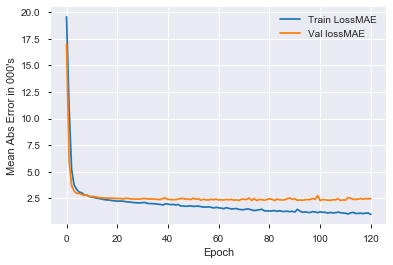

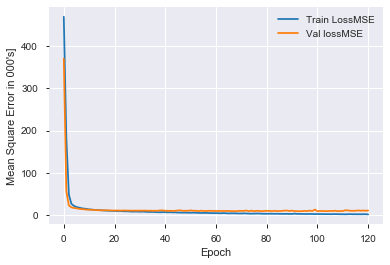

In [17]:
# Display training progress and print a dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
# Patience parameter is the amount of epochs to check for improvement while monitoring val_loss
earlystop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=20)

# Store training stats
history = model.fit(X_train, Y_train, epochs=500, # Store in variable history
                    validation_data=(X_test,Y_test), batch_size=10, # batch_size is the size of each batch in which data returned
                    verbose=0, # Silent so callback will be outputted. Verbose is used see the training progress of each epoch.
                    callbacks=[earlystop,PrintDot()]) # Print dots 

''' Print Graph Showing MAE & MSE Train and Val Loss '''
def plot_history(history):
  plt.figure() # Create figure object
  plt.xlabel("Epoch") # Label X
  plt.ylabel("Mean Abs Error in 000's") # Label Y
  plt.plot(history.epoch, np.array(history.history['mae']), # Pull info from model.fit
           label="Train LossMAE")
  plt.plot(history.epoch, np.array(history.history["val_mae"]), # Pull info from model.fit
           label = "Val lossMAE")
  plt.legend() # Add legend

  plt.figure() # Create figure object
  plt.xlabel("Epoch") # Label X
  plt.ylabel("Mean Square Error in 000's]") # Label Y
  plt.plot(history.epoch, np.array(history.history["mse"]), # Pull info from model.fit
           label="Train LossMSE")
  plt.plot(history.epoch, np.array(history.history["val_mse"]), # Pull info from model.fit
           label = "Val lossMSE")
  plt.legend() # Add legend
plot_history(history)

The following plot show the same information as the previous two created using the variable history during the fit process. The difference is that the following two plots are interactive, by this I mean that when the mouse pointer it placed on a point of the line is displays the position numbers (X, Y) of the graph. By using this graph we can see that the training set of the mean square error is around three and the training set of Mean Absolute Error is around one.

In [18]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mse'],# Add trace to plotly visualization ( Mean Square Error)
                    name='Train Loss'))

fig.add_trace(go.Scattergl(y=history.history['val_mse'],# Add trace to plotly visualization (Value Mean Square Error)
                    name='Val Error'))

fig.update_layout(xaxis_title='Epoch', yaxis_title='Mean Square Error') # Update X axis and Y axis

fig.show() # Show Graph

In [19]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], # Add trace to plotly visualization (Mean absolute Error)
                    name='Train Loss'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],# Add trace to plotly visualization (Value Mean absolute Error)
                    name='Val Error'))

fig.update_layout(xaxis_title='Epoch', yaxis_title='Mean Absolute Error') # Update X axis and Y axis

fig.show() # Show Graph

<hr>

## Best Regression Model To Use

Now it is time to start looking at regression. Scikit-learn offer different regression models so it is best to check them all visually with a box-whisker plot so I can decide what model is better for accuracy relating to the dataset produce. I will be investigating the Mean Squared Error and use this as the performance metric for the regression models. 

The mean squared error is the best option as it output how close a regression line is to a set of points. It it able to display this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. (Statistics How To, 2019)

In this section I will store the models in the same dictionary and use KFold. Kfold is used to split the dataset into K numbers of folds and each of these folds will be used as a testing set. I have specified k=5, so the following will be split into 5 folds and during the first interaction the first fold will be used for testing while the other four will be used for training the model. This process is continued until all the folds were used on the testing set. I have used random state  which will sets the seed for the random generator so that your train-test splits will be deterministic and not different each time.

The result from this shows that the Gradient Boost model is the best to use. I will use this model and Linear Regression to see what the difference in the mean square error is. 

Linear : -26.098, 8.701
Lasso : -30.613, 8.535
ElasticNet : -32.607, 10.142
KNN : -25.95, 14.38
DecisionTree : -27.672, 3.786
SVR : -36.368, 15.288
AdaBoost : -17.137, 8.594
GradientBoost : -11.232, 3.575
RandomForest : -16.185, 4.411
ExtraTrees : -12.936, 4.732


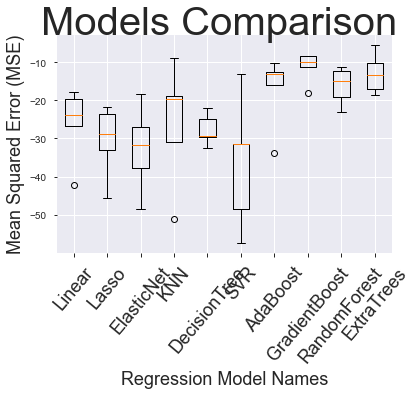

In [20]:
# Add models to a dict
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# Cross validation for each model (5-Fold)
model_results = [] # Store results
model_names   = [] # Store names
for model_name in models: # Start for loop to iterate the dict called models.
    model   = models[model_name]
    k_fold  = KFold(n_splits=5, random_state=9) # 5 folds and random_state
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring="neg_mean_squared_error")
    model_results.append(results) # Save to array
    model_names.append(model_name) # Save to arry
    print("{} : {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3))) # Display results & rounded

# Plot to compare regression models
figure = plt.figure() 
plt.rcParams["figure.figsize"] = (20,10) # Set size of graph 
figure.suptitle("Models Comparison", fontsize=40) # Add title and size
axis = figure.add_subplot(111) # 1x1 grid 
plt.boxplot(model_results) # Generate box plot
axis.set_xticklabels(model_names, rotation = 50, fontsize=18) # Rotate model names for better viewing, add size
plt.xlabel("Regression Model Names", fontsize=18) # XLabel and size
axis.set_ylabel("Mean Squared Error (MSE)", fontsize=18) #Xlabel and size
plt.show() # Display to screen


***

### Testing Models

The mean square error (MSE) should always produce a positive number that is used to evaluate the algorithm and how incorrect the predictions are. The ideal MSE is not zero, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data. The MSE will basically check what the difference is between the actual value and the predicted value. I have checked the output of the mean square error using both numpy and sklearn to see if it will return the same. Mean Absolute Error is used to measure the average magnitude of the errors in a given set of predictions. <i>(Agrimetsoft.com, 2019)</i>

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.<i>(The Balance Small Business, 2019)</i>

#### 1) Linear Regression

In statistics, linear regression is a very commonly used type of predictive analysis. The idea of regression is where we want to examine relationships between two or more variables. One variable is the independent variable while the other variable would be a dependent variable and searches for a statistical relationship but not deterministic relationship. The idea of linear regression is to use data to build a model used to predict future data. The predicted data is called the target, and the data used to make predictions are called the features.<i>(The Balance Small Business, 2019)</i>

We can see from the output that by using a Linear Regression model the returning mean squared error is 19.296 which is pretty good. We want this a low as possible and from the previous section where I found the best regression model it will be interesting to see what the difference will be between the best option and linear. The r2 that was calculated for the model is 0.718 (0.7) which is a very good result as 70% of the models can be explained by the inputs. 

In [21]:
# make predictions using Linear Regression

# Create linear model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Var to store predict X_test
predictions = linear_model.predict(X_test)

# Display the number of coefficients (len is used to get the length)
print("\nNumber of coefficients:", len(linear_model.coef_))

# Print Features and Coefficient values
r2 = pd.DataFrame(zip(attributes,linear_model.coef_),columns=["Features","Coefficients"])
print("\nPrint coefficient of each feature\n",r2)

#squared difference between predicted and what was predicted (Rounded to 3 decimal places) using sklearn 
print("\nMean Squared Error Using Sklearn  : {}".format(round(metrics.mean_squared_error(Y_test, predictions), 3)))

# 1. Mean squared error by numpy
mse = np.mean((predictions-Y_test)**2)
print("Mean Squared Error using numpy    :",np.round(mse, 3))

# Size of an error we can expect (Rounded to 3 decimal places)
print("\nMean Absolute Error  : {}".format(round(metrics.mean_absolute_error(Y_test, predictions), 3)))

# Find and print R-Squared (Rounded to 3 decimal places)
print("\nR-Squared:           : {}".format(round(linear_model.score(X_train,Y_train),3)))

rmseLM=np.sqrt(metrics.mean_squared_error(Y_test, predictions))
print('RMSE                 :', np.round(rmseLM, 3))


Number of coefficients: 13

Print coefficient of each feature
    Features  Coefficients
0      CRIM     -1.041737
1        ZN      1.002993
2     INDUS      0.362394
3      CHAS      0.562527
4       NOX     -1.834754
5        RM      2.663877
6       AGE      0.028501
7       DIS     -2.871232
8       RAD      2.488629
9       TAX     -1.949443
10  PTRATIO     -1.962298
11        B      0.730195
12    LSTAT     -3.817008

Mean Squared Error Using Sklearn  : 19.296
Mean Squared Error using numpy    : 19.296

Mean Absolute Error  : 3.054

R-Squared:           : 0.718
RMSE                 : 4.393


***
Below I have printed the actual house prices compared with the predicted house price. We can see that the model is pretty good at making predictions but it is not perfect as we knew from the result we received from the mean square error. 

In [22]:
''' Sample of Predicted Housing Prices '''
# Create a datafrae to store the predicted prices and Y_test 
df_predict = pd.DataFrame({"Observed":Y_test,"Predicted":predictions}) 
# Print the head of the dataframe
print(df_predict.head(20))

     Observed  Predicted
464      21.4  20.553001
419       8.4  15.095788
277      33.1  34.082252
491      13.6  14.502213
337      18.5  19.303501
167      23.8  23.253075
279      35.1  34.647798
4        36.2  27.904903
461      17.7  20.489317
146      15.6  16.380809
47       16.6  17.924550
481      23.7  27.224825
244      17.6  16.482581
369      50.0  32.231912
138      13.3  14.188317
2        34.7  30.542825
452      16.1  18.857522
357      21.7  22.689277
55       35.4  31.042813
441      17.1  17.567534


##### Scatter Plot
In the following plot, Y is the independent variable and X is the independent variable. The line through the graph is our regression line which represents the best fit line for all of the data points passed in. For this plot to be truly linear all the points would have to be on the blue line.  

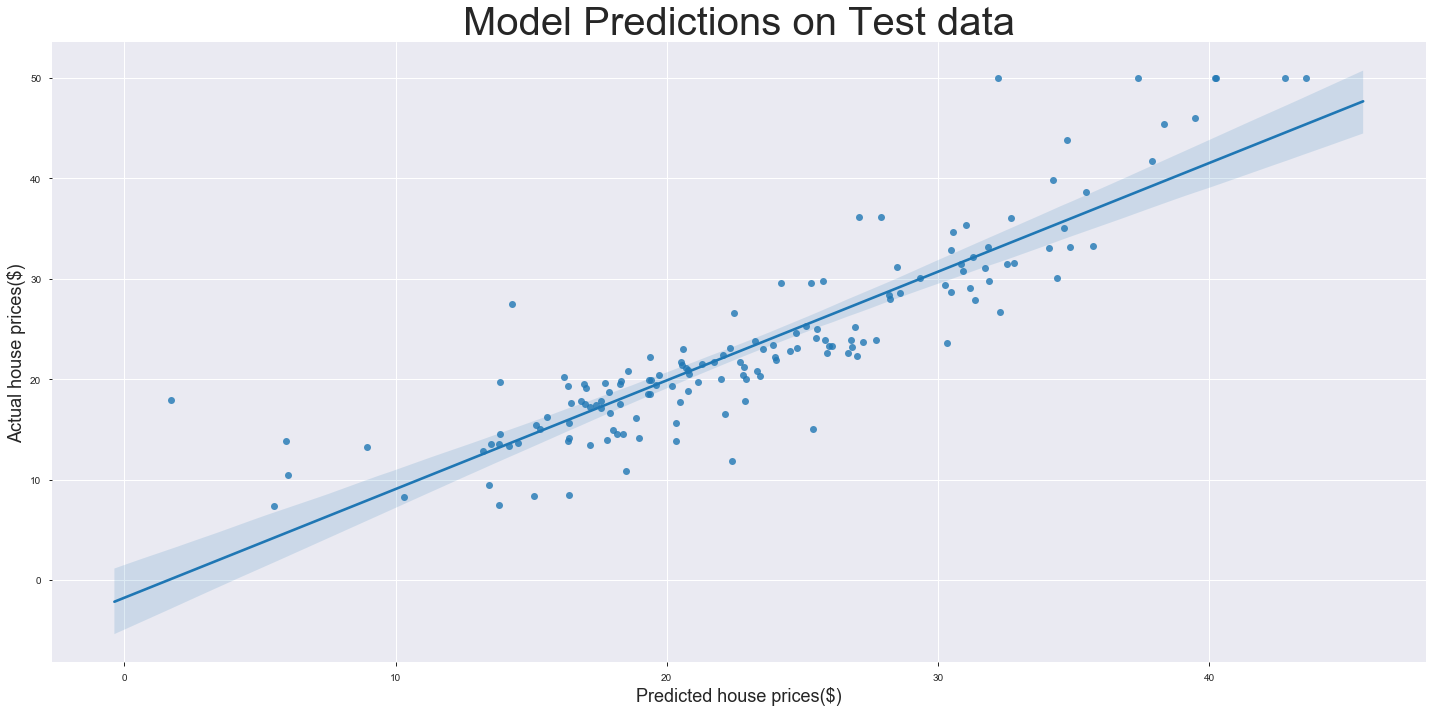

In [23]:
''' Output prediction on test set '''
g = sns.regplot(y=Y_test,x=predictions,fit_reg=True) # Plot prices v predictions 
plt.rcParams["figure.figsize"] = (20,10) # Set size of plot
plt.axis("tight")
plt.xlabel("Predicted house prices($)", fontsize=18) # x label and size
plt.ylabel("Actual house prices($)", fontsize=18) # y label and size
plt.title("Model Predictions on Test data", fontsize=40) # Title and size
plt.tight_layout()# automatically adjust params so that the subplot fits in to the figure area.
plt.show() # Show scatterplot

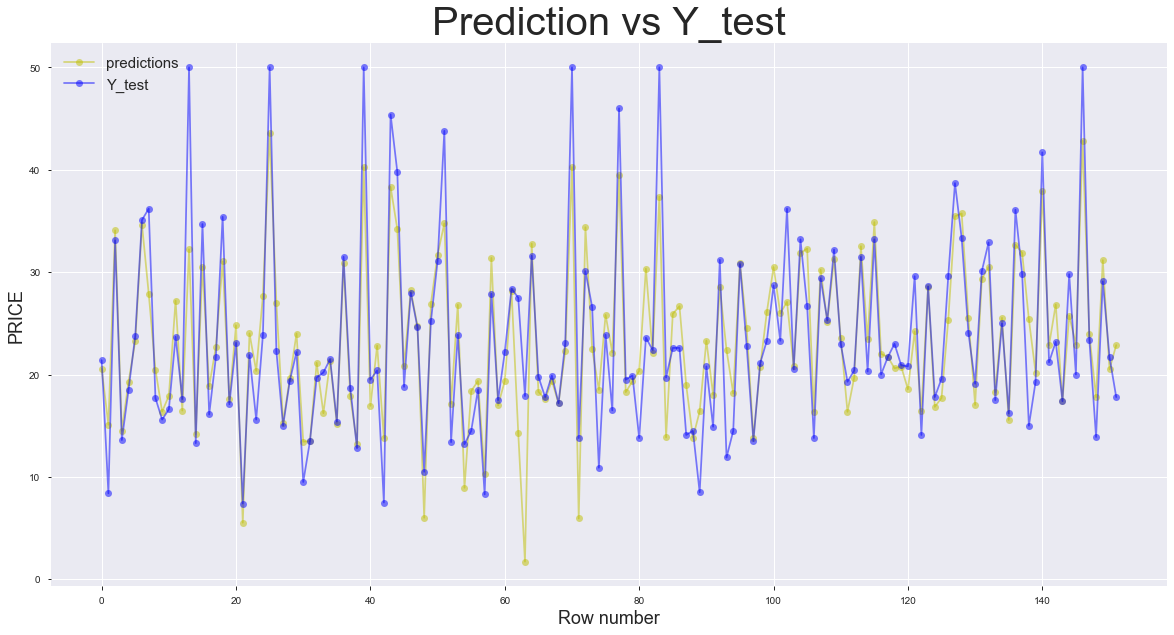

In [24]:
''' plot between predictions and Y_test'''
plt.rcParams["figure.figsize"] = (20,10) # Graph size
x_axis = np.array(range(0, predictions.shape[0])) # Returns an array with evenly spaced elements as per the interval
plt.plot(x_axis, predictions, marker="o", alpha=0.5, color='y', label="predictions") # Plot predicted prices
plt.plot(x_axis, Y_test,     marker="o", alpha=0.5, color='b', label="Y_test") # plot actual prices
plt.xlabel("Row number",fontsize=18) # X label and size
plt.ylabel("PRICE", fontsize=18) # y label and size
plt.title("Prediction vs Y_test", fontsize=40) # Title and size
plt.legend(loc="upper left", fontsize=15) # Add legend top
plt.show() # Show plot

##### Histogram

The following histogram is based on predictions and shows that the values are distributed normally and that most of the predicted house prices range form fifteen to thirty.  

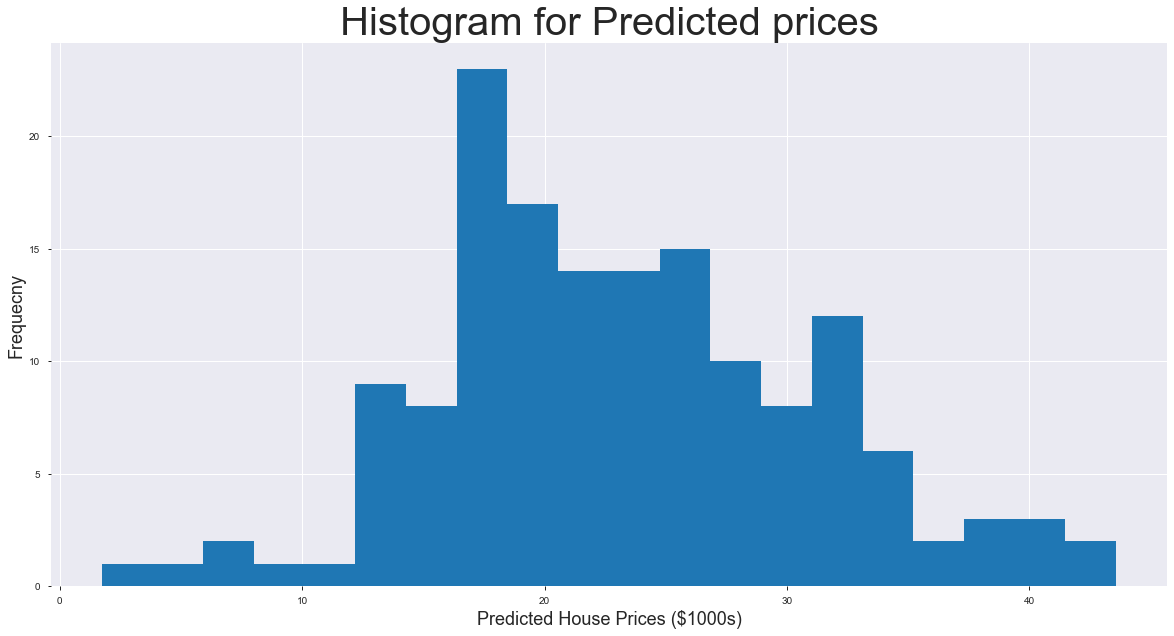

In [25]:
# Histogram: Plot a histogram of all the predicted prices
plt.hist(predictions, bins=20) # Generate based on prediction and set bins
plt.rcParams["figure.figsize"] = (20,15) # Set graph size 
plt.xlabel("Predicted House Prices ($1000s)", fontsize=18) # X label Size
plt.ylabel("Frequecny", fontsize=18) # Y label size
plt.title('Histogram for Predicted prices', fontsize=40) # Title and Size
plt.show() # Show Histogram

####  2) Gradient Boosting Regression

Earlier I have checked to see what regression model would be better to use on my model and based on the results this was the best. I expect to see a much better mean square error as apposed to liner regression. 

Gradient boosting is a very popular type of regression that is used in machine learning that builds an additive model. In every different stage a regression tree will be fit on the negative gradient of the given loss function. This regression has three functions. A loss function that will has to be optimized, a weak learner that will make predictions and an additive model that will be used to add weak learners with the aim to minimize the loss function.<i>(Medium, 2019)</i>

Using this regression we can see that the R2 score is 0.982 and MSE is 10.196 are both very good, the MSE is around half of what was returned from using linear regression. We have found a model that will be very good at predicting the median price value of a house.

In [26]:
# make predictions using the model

# create and fit model
Gradient = GradientBoostingRegressor()
Gradient.fit(X_train, Y_train)

# make predictions using the model
prediction = Gradient.predict(X_test)

#squared difference between predicted and what was predicted (Rounded to 3 decimal places)
print("\nMean Squared Error   : {}".format(round(mean_squared_error(Y_test, prediction), 3)))

# Size of an error we can expect (Rounded to 3 decimal places)
print("Mean Absolute Error  : {}".format(round(mean_absolute_error(Y_test, prediction), 3)))

# Find and print R-Squared (Rounded to 3 decimal places)
print("R-Squared:           : {}".format(round(Gradient.score(X_train,Y_train),3)))

rmseGM = np.sqrt(metrics.mean_squared_error(Y_test, prediction))
print("RMSE                 :",np.round(rmseGM, 3))


Mean Squared Error   : 10.415
Mean Absolute Error  : 2.323
R-Squared:           : 0.982
RMSE                 : 3.227


***
Below I have printed the actual house prices compared with the predicted house price. We can see that the model is a better option for making predictions but it is still not perfect as we knew from the result we received from the mean square error.

In [27]:
''' Sample of Predicted Housing Prices '''
# Create a datafrae to store the predicted prices and Y_test 
df_predict = pd.DataFrame({"Observed":Y_test,"Predicted":prediction}) 
# Print the head of the dataframe
print(df_predict.head(20))

     Observed  Predicted
464      21.4  20.007558
419       8.4  15.322349
277      33.1  31.939205
491      13.6  15.575708
337      18.5  19.005021
167      23.8  19.656880
279      35.1  30.784181
4        36.2  34.592050
461      17.7  18.699066
146      15.6  18.040002
47       16.6  18.536660
481      23.7  26.321431
244      17.6  18.367711
369      50.0  48.376989
138      13.3  13.315089
2        34.7  37.466567
452      16.1  17.284414
357      21.7  21.040510
55       35.4  32.981764
441      17.1  13.155143


##### Scatter Plot
In the following plot, Y is the independent variable and X is the independent variable. The line through the graph is our regression line which represents the best fit line for all of the data points passed in. For this plot to be truly linear all the points would have to be on the blue line.  

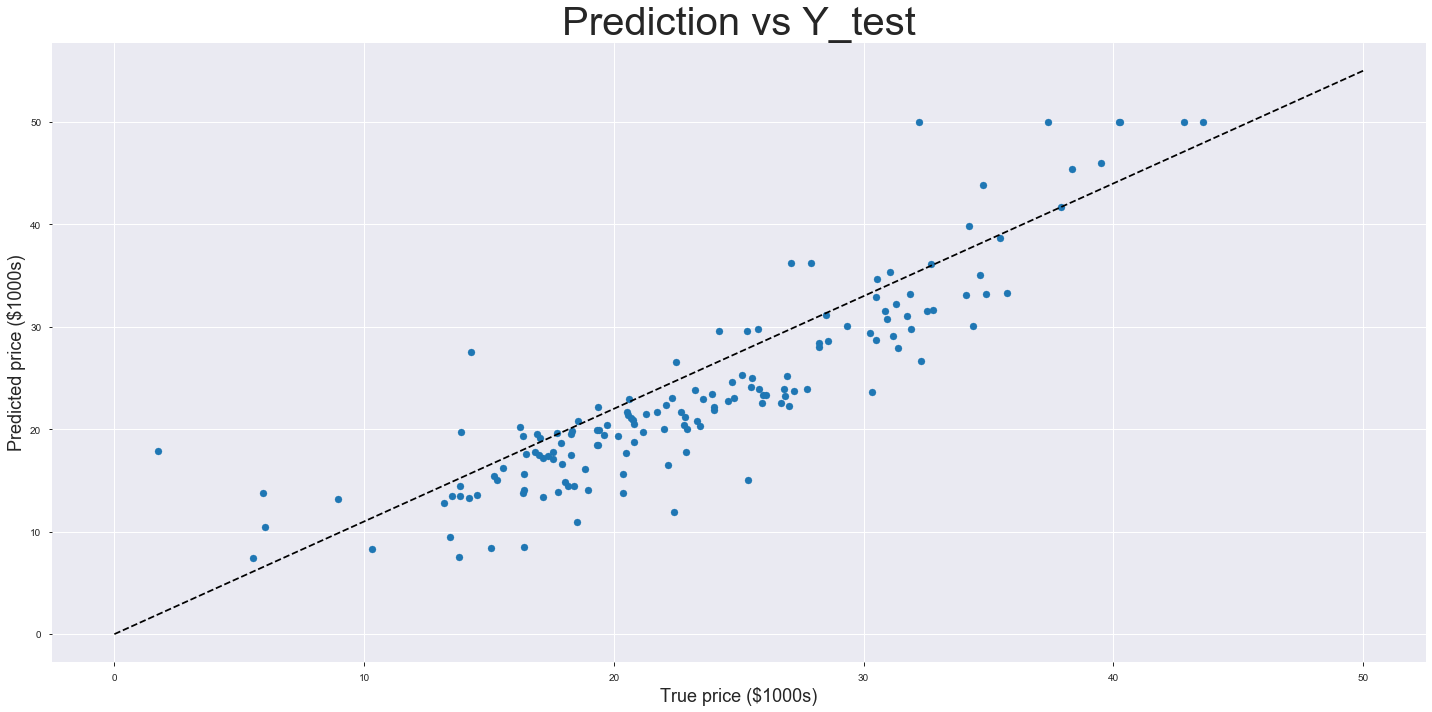

In [28]:
plt.figure(figsize=(20, 10)) # Size of plot
plt.scatter(y=Y_test,x=predictions) # What to display
plt.plot([0, 50], [0, 55], "--k") # Plot line with broken line
plt.axis('tight')
plt.xlabel("True price ($1000s)",  fontsize=18) # X label and size
plt.ylabel("Predicted price ($1000s)",  fontsize=18) # Y label and size
plt.title("Prediction vs Y_test",  fontsize=40) # Title and size
plt.tight_layout() # automatically adjust params so that the subplot fits in to the figure area.
plt.show() # Show plot

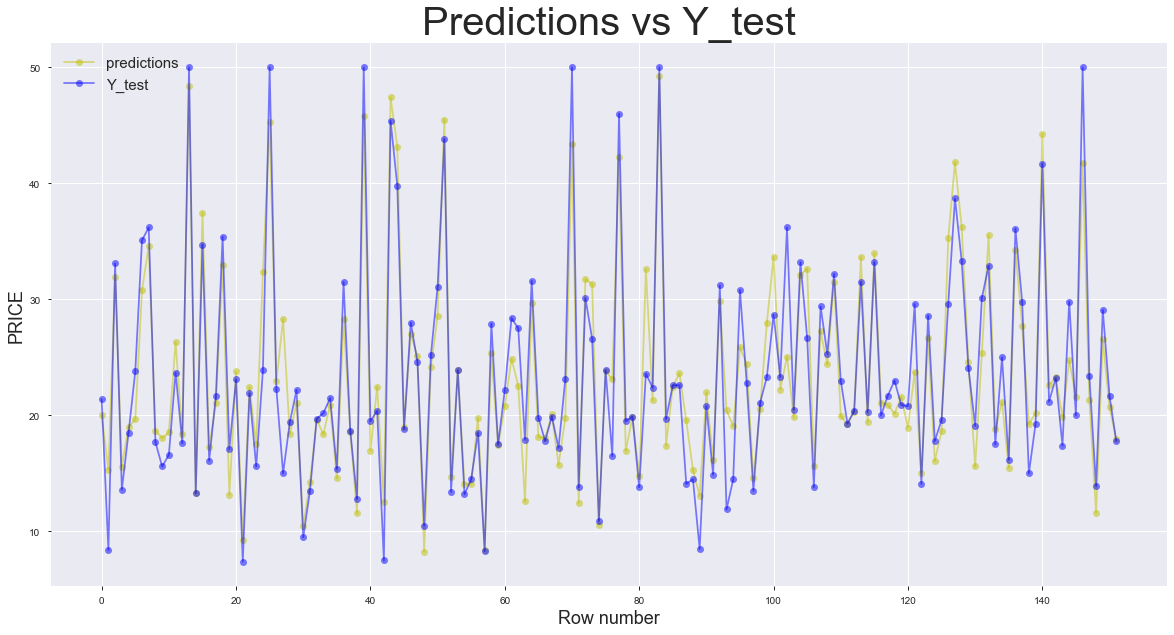

In [29]:
''' plot between prediction and Y_test'''
plt.rcParams["figure.figsize"] = (20,10) # Graph size
x_axis = np.array(range(0, predictions.shape[0])) # Returns an array with evenly spaced elements as per the interval
plt.plot(x_axis, prediction, marker="o", alpha=0.5, color='y', label="predictions") # Plot predicted prices
plt.plot(x_axis, Y_test,     marker="o", alpha=0.5, color='b', label="Y_test")  # plot actual prices
plt.xlabel("Row number", fontsize=18) # X label and size
plt.ylabel("PRICE", fontsize=18) # y label and size
plt.title("Predictions vs Y_test", fontsize=40)  # Title and size
plt.legend(loc="upper left", fontsize=15) # Add legend top
plt.show() # Show plot

#### Histogram

The following histogram is based on predictions and shows that the values are distributed normally and that most of the predicted house prices range form fifteen to twenty-five.  

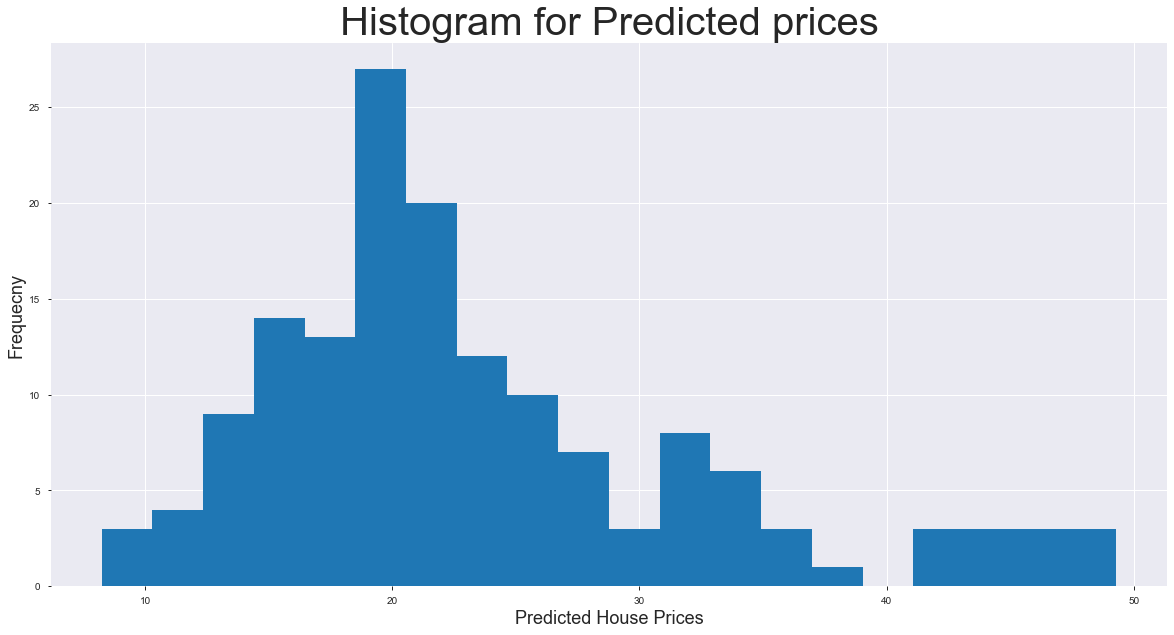

In [30]:
# Histogram: Plot a histogram of all the predicted prices
plt.hist(prediction, bins= 20)
plt.rcParams["figure.figsize"] = (20,15)
plt.xlabel("Predicted House Prices", fontsize=18)
plt.ylabel("Frequecny", fontsize=18)
plt.title("Histogram for Predicted prices", fontsize=40)
plt.show()

##### Future importance (Gradient Boosting Regressor)

The following graph will display a graph of the Gradient Boosting Regressor that will display which variable importance by displaying how important each feature is. It will display how valuable each of the features was when creating the boosted tree within the model. As we can see RM and LSTAT was the most used attributes while CHAS does not appear to have been used at all. 

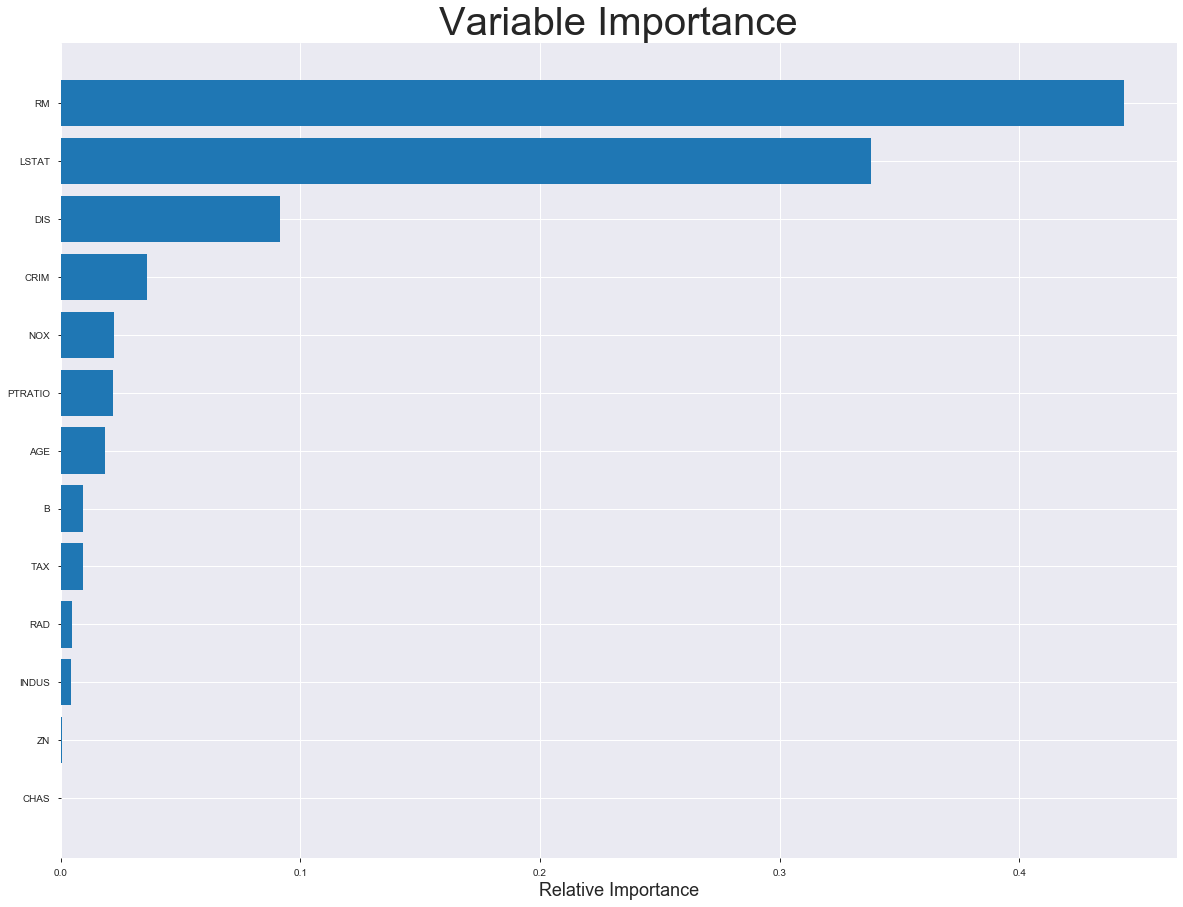

In [31]:
# plot model's feature importance
importance = Gradient.feature_importances_ # Feature importance from Gradient stored in important
sorted = np.argsort(importance) # index of greatest to least stored in sorted
pos = np.arange(sorted.shape[0]) # Returns an array with evenly spaced elements as per the interval
 
plt.barh(pos, importance[sorted])  # Horizontal bar plot.
plt.yticks(pos, attributes[sorted]) 
plt.xlabel("Relative Importance", fontsize=18) # Label and size
plt.title("Variable Importance", fontsize=40) # Label and size
plt.show() # Show bar

## SHAP & KNN

We can use plot the features using SHAP(SHapley Additive exPlanation) to view which are the most important features with the dataset. SHAP is a very popular library that is used for model explainability. Shapley values consider all possible predictions for an instance using all possible combinations of inputs. Because of this exhaustive approach, SHAP can guarantee properties like consistency and local accuracy. <i>(Poduska, 2019)</i>.

When using SHAP on KNN it produced a warning that by having over five hundred background data samples it could cause much slower run times and that I should consider using shap.kmeans(data, K) to summarise the background. Once this was implemented the running time was reduced to a few minutes as this will summarise the data using a k-means algorithm but I will have to sacrifice some accuracy and reliability.  

The k-Nearest neighbours algorithm is used for regression and classification problems. It is a powerful tool to use when little or no knowledge is know about the distribution of data. According to (scikit-learn video #4: Model training and prediction with K-nearest neighbors, 2019) "KNN can predict the response class for a future observation by calculating the "distance" to all training observations and assuming that the response class of nearby observations is likely to be similar."

When we use a scikitlearn training module they are all implemented in the estimator classes. When the algorithm has extracted the required information from the training data it will be stored in the knn object. N_neighbors specifies the number of neighbor points to be considered. Knn is called a lazy learner because it does not really get trained but will take all of the data with it as it tests each attribute. Knn.fit takes in the feature matrix named X_train and the response vector named y_train. 

In [32]:
# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

# Knn.fit takes in the feature matrix named X_train and the response vector named Y_train. 
knn.fit(X_train, Y_train)

#pre = knn.predict(X_test)

# building the kmeans summary
X_train_summary = shap.kmeans(X_train, 10)
 
# Start time counter
start_time = time.time()

# Object to calculate shap values & use kmeans
explainerKNN = shap.KernelExplainer(knn.predict,X_train_summary)

# Calculate the Shap values
shap_values = explainerKNN.shap_values(X_test)

# End time counter
end_time = time.time()

# Calculate amount of time
total_time=end_time-start_time

# Print amount of time
print("The amount of time this took to run is :",total_time, "seconds")


The amount of time this took to run is : 48.69252681732178 seconds


The following plot will use SHAP to show the distributions of each feature. The colour is a representation of the feature value where red will be high and blue will be low). From the output we can see where LSTAT (% lower status of the population) is high it will lower the predicted price<i> of</i> a home. <i>(Poduska, 2019), (platform)? et al., 2019)</i>

To interpret the following SHAP plots we find the predict which in this case the output is 19.50 with a base value of 20.95 (These Output Might Differ When The Notebook Is Executed Again) Looking at the pot we can see different colours that represent different aspects, features are in pink/red and blue. The pink/red features are what is causing the increased predictions while the blue features are decreasing the predictions. We can see that RAD has the biggest impact at 1.628. On the blue side the largest impact comes from NOX at 0.8329.<i>(Kaggle.com, 2019)</i>


The visualization below shows the explanations for one prediction based on i-th data.
    * Red represents a positive impact on the prediction
    * Blue represents a negative impacts on the prediction

In [33]:
shap.initjs()
i=0
# Plot the SHAP explainer using KNN
shap.force_plot(explainerKNN.expected_value, shap_values[i], X_test.iloc[i])

In [34]:
shap.initjs()
# visualize the training set predictions by selected from the dropdown boxes
shap.force_plot(explainerKNN.expected_value, shap_values, X_test)

The following plot is a general overview of the most import features by sorting the features and finding the sum of SHAP. The Y-Axis displays the variable name from top to bottom in order of importance On the x-axis is the SHAP value.


From the plot bases on the current output we can see that a high LSTAT lowers the predicted home price and that a high RM will increase the predicted home price.

##### Future importance 

The following graph will display a graph of variable importance by displaying how important each feature is. It will display how valuable each of the features. As we can see RM and LSTAT was the most used attributes.

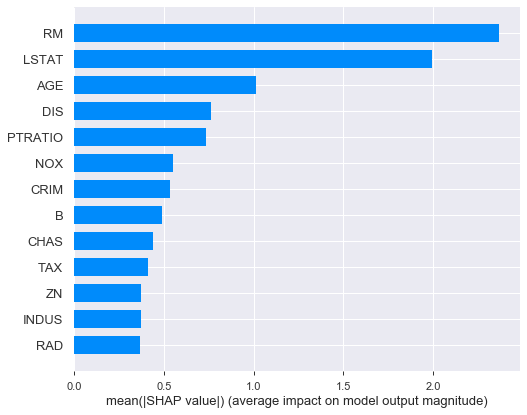

In [35]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

The following plot is a general overview of the most import features by sorting the features and finding the sum of SHAP. The Y-Axis displays the variable name from top to bottom in order of importance On the x-axis is the SHAP value.

From the plot bases on the current output we can see that a high LSTAT lowers the predicted home price and that a high RM will increase the predicted home price.

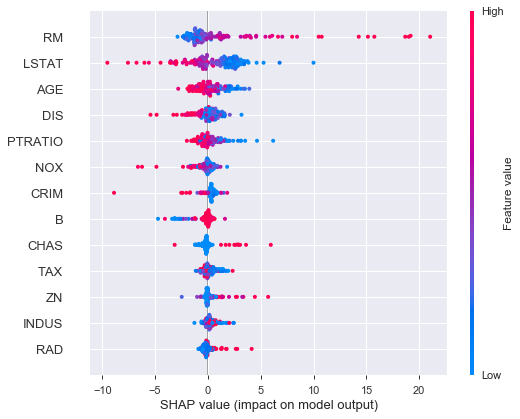

In [36]:
shap.initjs()
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

### Conclusion
In conclusion this project was both hard and interesting, I have learned many new things and way to think and approach a task with a dataset. I have looked at the dataset and displayed my finding throughout the documents.

The total number of houses along the river is 35 , and has median price in 000's was 23.30 while the total number of houses not along the river is 471 , and has a median price in 000's of 20.90, this is a difference of 2.4 which is not bad.

Implemented Keras where I split the dataset up for testing, I created a graph that displays multiple regression options and what would be the best option for my model. This graph displayed that a Gradient Boosting Regressor would be the best option so I have implemented this along with a linear regression and the mean square error was much less at 10.235 while the linear regression mean square error was 19.296. I have also used KNN along with SHAP as another comparison that displays nice visualisations.